# Mobile Price Classification

![Mobile](https://water.r.worldssl.net/assets/images/Smartphone-Evolution.jpg)

Dataset variable description as follows:

ID: Number sequence

Battery_power: Total energy a battery measured in mAh

blue:  bluetooth facility available or not

clock_speed: speed of microprocessor

dual_sim: Dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G  network or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera megapixels

px_height: Pixel Height

px_width: Pixel Width

ram: Random Access Memory

sc_h: Screen Height  in cm

sc_w: Screen Width  in cm

talk_time: longest time that a  battery will charge 

three_g: 3G  Network or not

touch_screen:  Touch screen or not

wifi:  wifi facility available or not

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Loading dataset 

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# Mob_train=pd.read_csv('/content/train.csv')
# Mob_test=pd.read_csv('/content/test.csv')

In [197]:
Mob_train=pd.read_csv('/Users/renukaambarapu/Downloads/archive/train.csv')
Mob_test=pd.read_csv('/Users/renukaambarapu/Downloads/archive/test.csv')

In [198]:
Mob_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [199]:
Mob_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
print("Train rows and col : ",Mob_train.shape,"\n","Test rows and col : ",Mob_test.shape)

Train rows and col :  (2000, 21) 
 Test rows and col :  (1000, 21)


In [7]:
print(Mob_train.info(),Mob_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
Mob_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [60]:
print(Mob_train.isnull().sum(), Mob_test.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


## Detailed exploratory data analysis

#### Heat map to explain the correlation betweek the columns

Also its is seen that ram is highly correlated with price 

<AxesSubplot:>

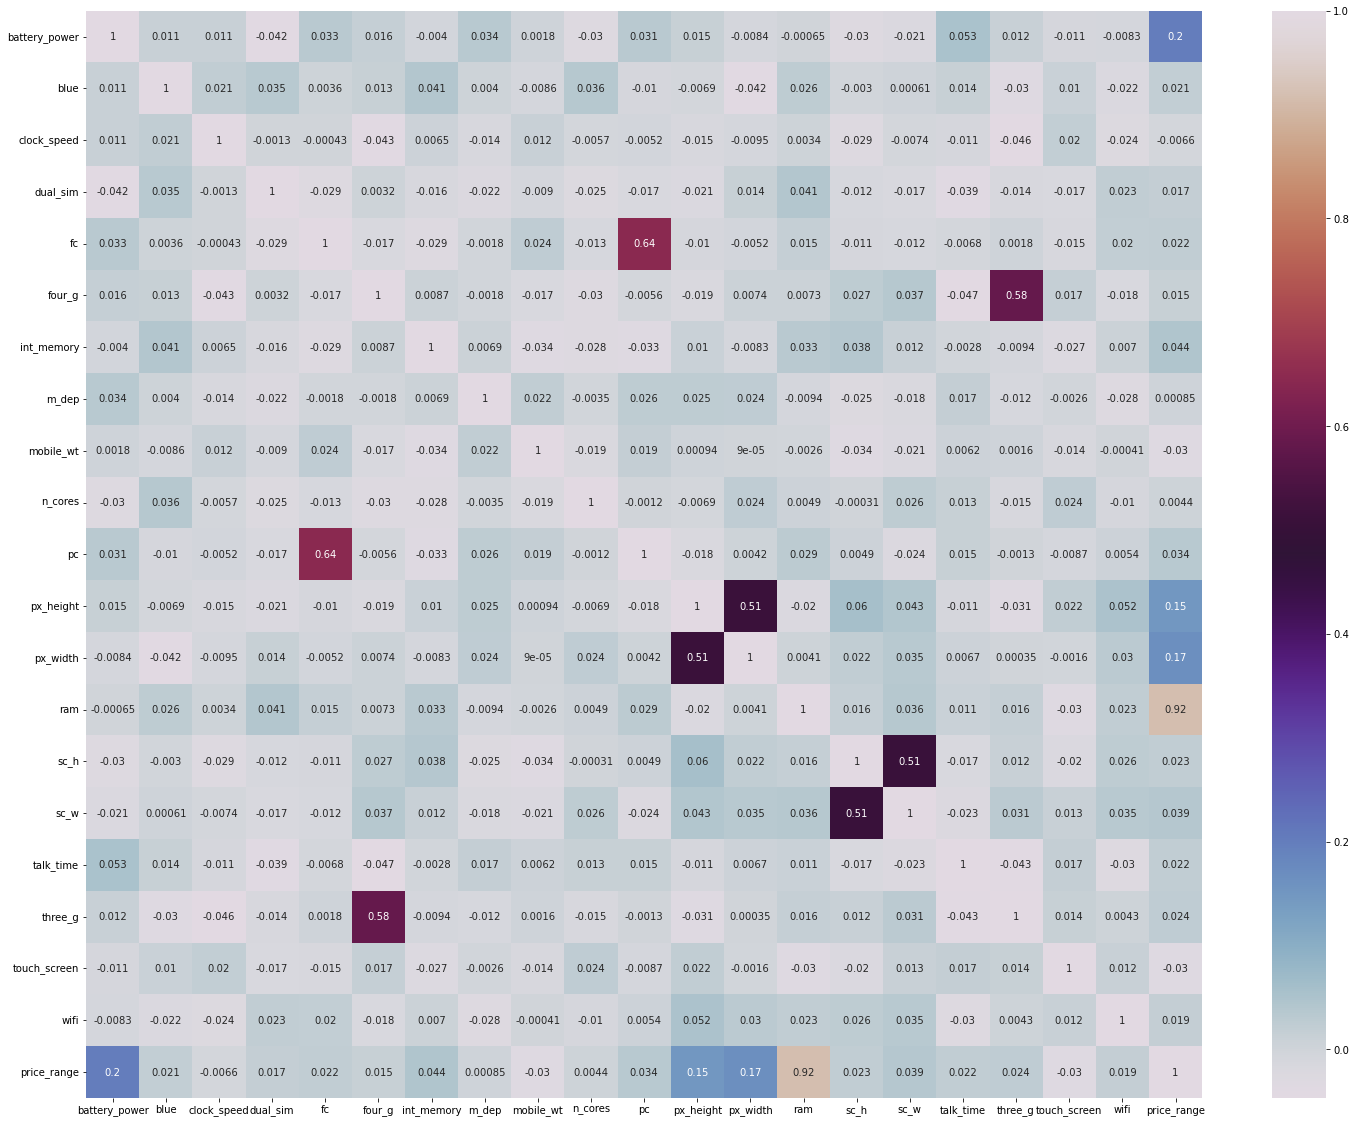

In [185]:
plt.figure(figsize = (25,20))
sb.heatmap(Mob_train.corr(),annot=True,cmap='twilight')
plt.savefig("Correlation.png")

#### Histogram :

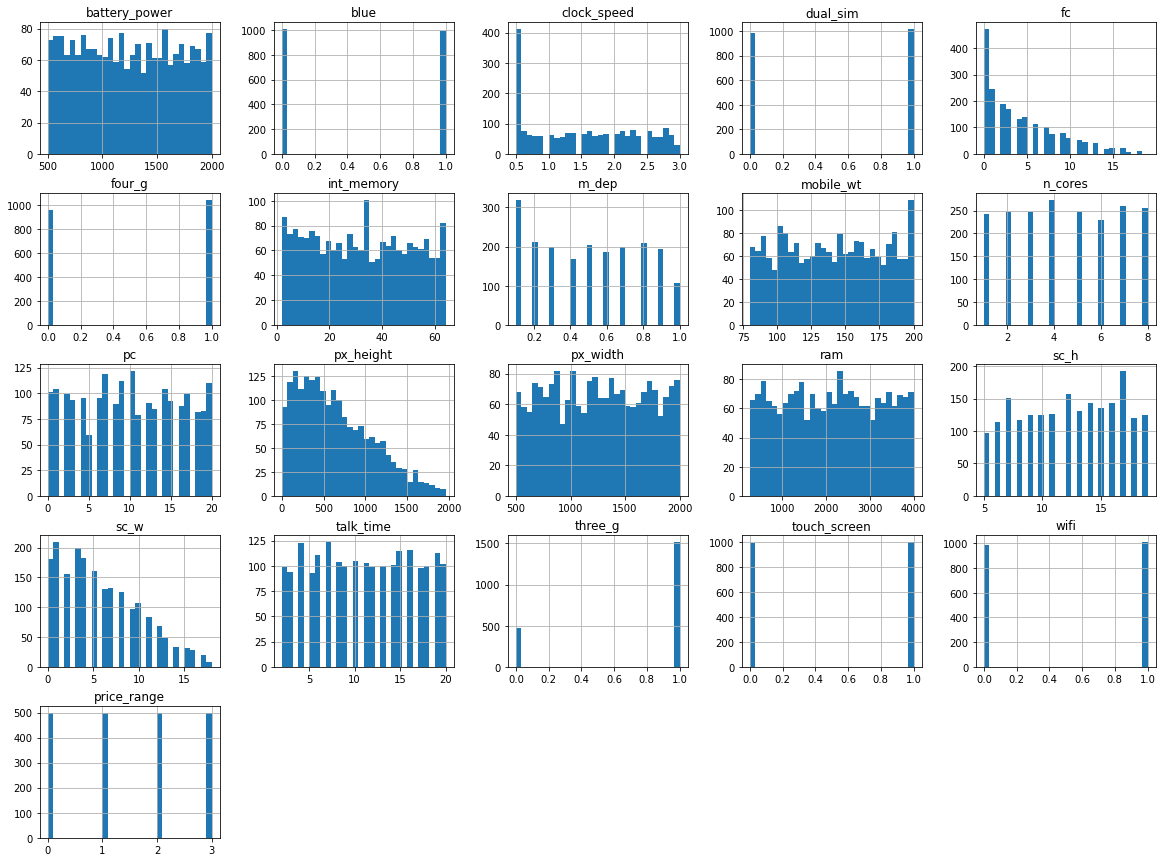

In [162]:
Mob_train.hist(figsize=(20,15), bins=30)
plt.savefig("Histogram.png")
plt.show()

#### Count plots :

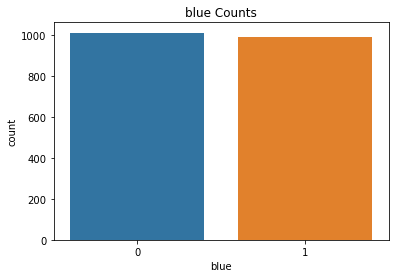

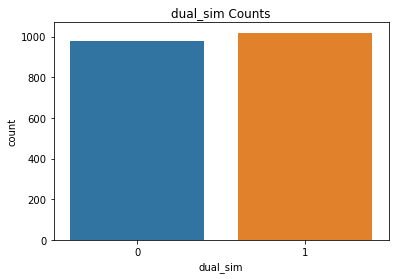

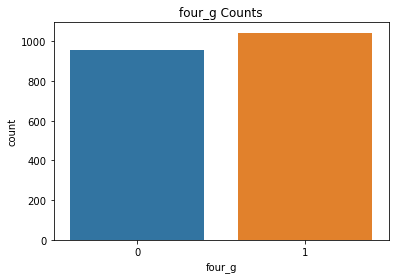

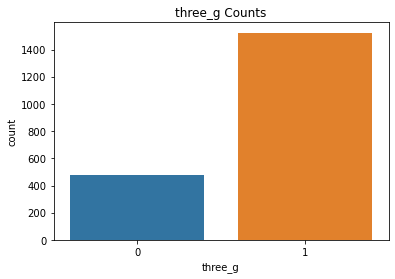

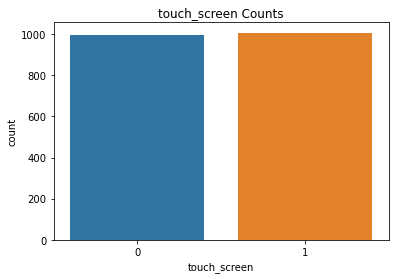

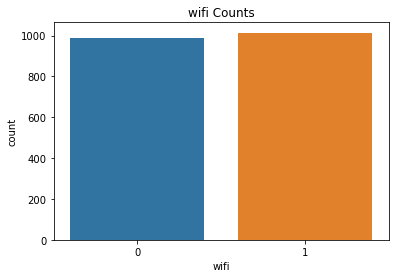

In [186]:
categorical_columns = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
numerical_columns = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc',
                'px_height','px_width','ram','sc_h','sc_w','talk_time']

        
for i in categorical_columns:
        Mob_train[i].value_counts()
        sb.countplot(x=i,data=Mob_train)
        plt.title(str(i)+' Counts')
        plt.savefig(str(i)+" categorical Counts.png")
        plt.show()

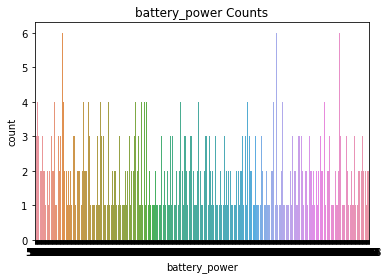

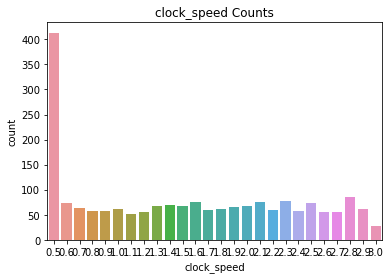

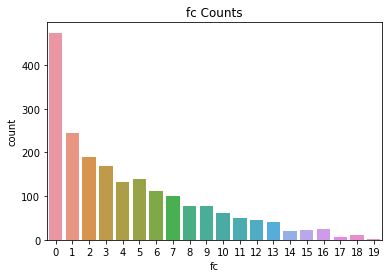

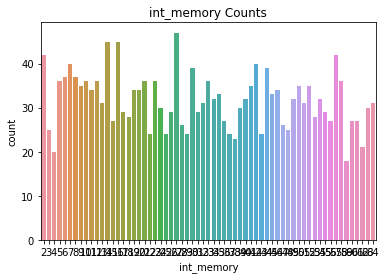

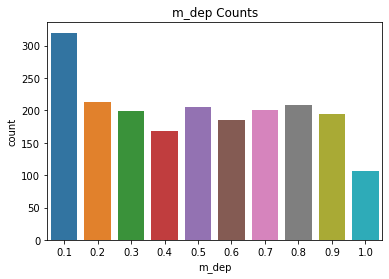

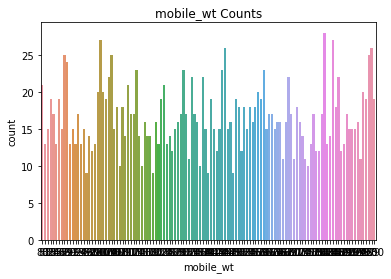

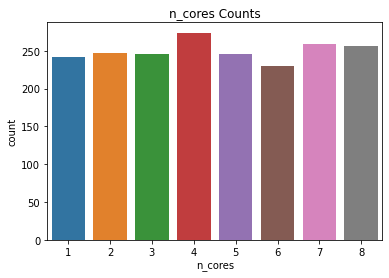

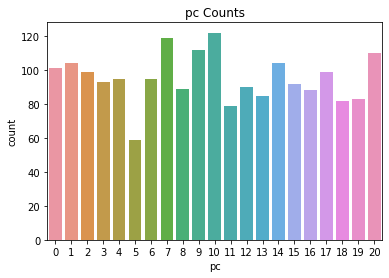

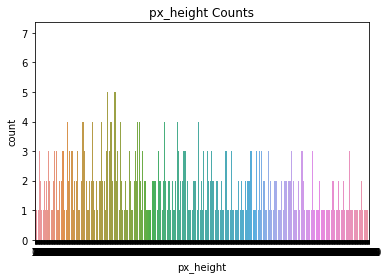

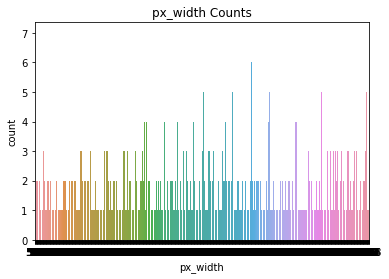

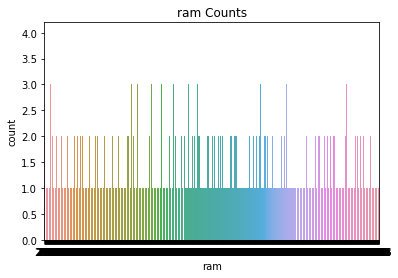

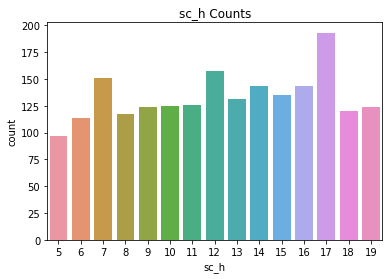

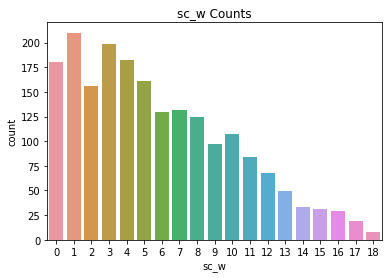

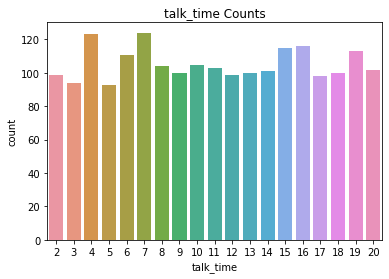

In [187]:
        
for i in numerical_columns:
        Mob_train[i].value_counts()
        sb.countplot(x=i,data=Mob_train)
        plt.title(str(i)+' Counts')
        plt.savefig(str(i)+" Numerical Counts.png")
        plt.show()

#### Box plot :

[Text(0, 0, 'battery_power'),
 Text(1, 0, 'blue'),
 Text(2, 0, 'clock_speed'),
 Text(3, 0, 'dual_sim'),
 Text(4, 0, 'fc'),
 Text(5, 0, 'four_g'),
 Text(6, 0, 'int_memory'),
 Text(7, 0, 'm_dep'),
 Text(8, 0, 'mobile_wt'),
 Text(9, 0, 'n_cores'),
 Text(10, 0, 'pc'),
 Text(11, 0, 'px_height'),
 Text(12, 0, 'px_width'),
 Text(13, 0, 'ram'),
 Text(14, 0, 'sc_h'),
 Text(15, 0, 'sc_w'),
 Text(16, 0, 'talk_time'),
 Text(17, 0, 'three_g'),
 Text(18, 0, 'touch_screen'),
 Text(19, 0, 'wifi'),
 Text(20, 0, 'price_range')]

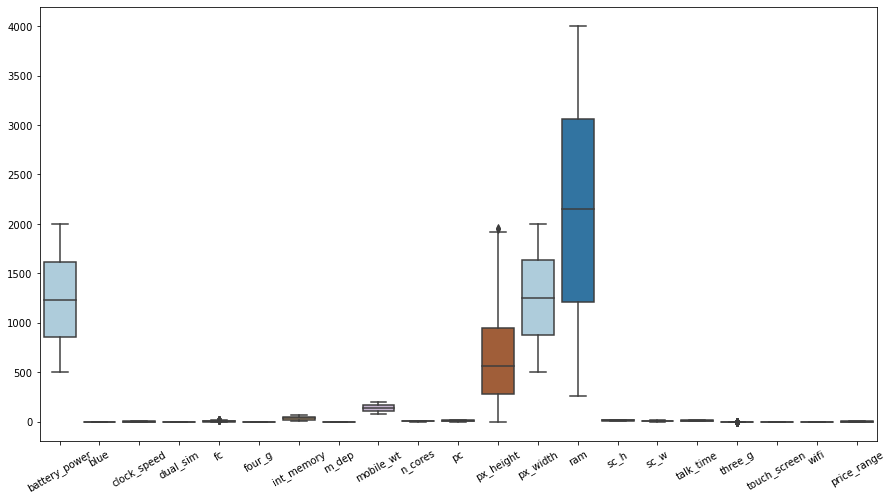

In [202]:

plt.figure(figsize = (15,8))
ax = sb.boxplot(data = Mob_train, palette="Paired")
plt.savefig("Boxplot.png")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [51]:
X=Mob_train.drop('price_range',axis=1)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [55]:
Y=Mob_train['price_range']

In [58]:
Mob_train['price_range'].unique()
Mob_train.groupby('price_range').size()

price_range
0    500
1    500
2    500
3    500
dtype: int64

In [72]:
print(Mob_train.shape,Mob_test.shape)

(2000, 21) (1000, 20)


In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [78]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
816,805,1,0.7,0,0,0,64,0.1,97,4,14,641,704,418,11,6,17,0,1,1
790,911,1,2.9,0,0,0,46,0.1,181,5,1,461,670,363,9,5,17,0,1,0
361,899,0,0.5,1,13,1,57,0.9,172,2,18,788,1331,364,11,1,7,1,1,0
592,1263,0,0.5,0,12,0,64,0.3,175,5,18,178,1883,1183,14,3,17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1203,1,0.5,1,0,1,11,0.9,109,2,12,35,510,1672,17,13,19,1,1,0
1096,1154,0,2.0,0,6,1,35,0.8,159,5,16,1003,1827,3262,16,15,16,1,0,0
1932,718,1,1.6,1,1,1,30,0.4,93,3,12,662,997,1601,10,9,12,1,1,1
235,1523,1,1.8,0,6,1,11,0.1,129,1,8,148,1606,707,19,8,19,1,1,0


In [79]:
y_train

0       1
816     0
790     0
361     0
592     1
       ..
1791    0
1096    3
1932    1
235     0
1061    1
Name: price_range, Length: 1600, dtype: int64

In [84]:
from sklearn.preprocessing import StandardScaler
Std_scalar=StandardScaler()

X_train_ss=Std_scalar.fit_transform(X_train)
X_test_ss=Std_scalar.transform(X_test)

### Logistic Regression Classifier

In [95]:
from sklearn.linear_model import LogisticRegression
Logistic_Reg=LogisticRegression()

Logistic_Reg.fit(X_train_ss,Y_train)

y_predict_lg=Logistic_Reg.predict(X_test_ss)
y_predict_lg


array([0, 0, 1, 1, 2, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 0, 3, 2, 1,
       1, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 1, 1,
       0, 2, 1, 0, 3, 1, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 1, 2, 3, 2, 2, 0, 1, 1, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 3, 2, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 3, 2, 3, 2,
       2, 1, 0, 1, 3, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 2,

### K Neighbors Classifier

In [93]:
from sklearn.neighbors import KNeighborsClassifier
KNeighbor = KNeighborsClassifier()

KNeighbor.fit(X_train_ss,Y_train)

y_predict_kn=KNeighbor.predict(X_test_ss)
y_predict_kn


array([0, 1, 1, 0, 1, 1, 0, 2, 1, 3, 0, 3, 2, 0, 2, 0, 1, 1, 1, 2, 3, 2,
       1, 3, 3, 2, 2, 1, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 1, 1, 0, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 1, 0, 3, 3, 1, 3, 0, 1, 0, 0, 3, 2, 2, 3, 1, 2, 0,
       2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 3, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 3, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 0, 1, 0, 0, 2, 3, 1, 0,
       0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 3, 0, 3, 2, 3, 2, 1, 0, 1, 0, 1, 3,
       2, 0, 1, 3, 0, 3, 0, 2, 1, 3, 3, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 3,
       2, 0, 3, 2, 0, 3, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0, 3, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 2, 1, 0, 3, 2, 1, 0, 1, 3, 3, 1, 1, 0, 1, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 0, 3, 2, 2, 0, 0, 1, 1, 3, 1, 2, 1, 0, 1, 0, 1, 2,
       2, 2, 2, 0, 1, 0, 3, 0, 0, 2, 2, 3, 0, 2, 1, 2, 3, 1, 1, 0, 2, 1,
       1, 2, 0, 0, 1, 3, 1, 3, 0, 0, 2, 3, 3, 3, 0,

### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree=DecisionTreeClassifier()

DecisionTree.fit(X_train_ss,Y_train)

y_predict_Dt=DecisionTree.predict(X_test_ss)
y_predict_Dt


array([0, 0, 1, 0, 3, 2, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 1, 0, 2, 0, 2, 2,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 3, 0, 3, 3, 1, 2, 1, 1, 0, 0, 3, 1, 2, 3, 2, 3, 1,
       1, 1, 2, 0, 1, 0, 2, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 2, 2, 0, 0, 0, 3, 0, 1, 1, 1, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 1, 2, 0, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 2, 1, 3, 0, 1, 1, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 3, 1,
       0, 1, 2, 2, 3, 3, 1, 3, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       1, 2, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 2, 3, 0, 1, 1, 3, 3, 1, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 3, 2,

## Support Vector

In [101]:
from sklearn.svm import SVC
Support_Vector = SVC(kernel="linear")
                     

Support_Vector.fit(X_train_ss,Y_train)

y_predict_Sv=Support_Vector.predict(X_test_ss)
y_predict_Sv


array([0, 0, 1, 1, 2, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 0, 3, 2, 1,
       0, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 1, 1,
       0, 2, 1, 0, 3, 1, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 1, 2, 3, 2, 2, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 3, 2, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 2, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 3, 2, 3, 2,
       2, 1, 0, 1, 3, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 2,

## Random Forest 

In [104]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier(n_estimators=10)
Random_Forest.fit(X_train_ss,Y_train)

y_predict_rf=Random_Forest.predict(X_test_ss)
y_predict_rf

array([0, 0, 1, 0, 3, 1, 1, 2, 3, 3, 0, 3, 1, 0, 3, 0, 0, 1, 1, 2, 3, 3,
       0, 2, 3, 2, 2, 3, 1, 2, 2, 0, 2, 0, 3, 3, 0, 0, 0, 0, 1, 0, 2, 2,
       0, 1, 2, 2, 1, 2, 2, 3, 1, 3, 2, 3, 1, 3, 3, 1, 0, 2, 1, 3, 1, 1,
       0, 2, 3, 3, 1, 2, 0, 2, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       2, 1, 3, 0, 1, 1, 1, 2, 3, 0, 2, 3, 3, 3, 0, 2, 1, 0, 1, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 0, 1, 1, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 1, 2, 3, 2, 1,
       0, 2, 1, 0, 3, 1, 3, 0, 2, 2, 3, 1, 2, 1, 3, 3, 1, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 1, 0, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 0, 1, 2, 3,
       3, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 2, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 1, 3, 2,
       2, 1, 0, 0, 2, 0, 3, 3, 2, 0, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 2, 2, 0, 3, 0, 2, 3, 2, 1, 2, 2, 0,
       1, 3, 0, 0, 1, 3, 1, 3, 0, 0, 1, 2, 3, 3, 2,

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Accuracy :

In [107]:
Accuracy={}

Accuracy['Logistic_Reg_Accuracy'] = accuracy_score(y_test,y_predict_lg)
Accuracy['KNeighbor_Accuracy'] = accuracy_score(y_test,y_predict_kn)
Accuracy['DecisionTree_Accuracy'] = accuracy_score(y_test,y_predict_Dt)
Accuracy['Support_Vector_Accuracy'] = accuracy_score(y_test,y_predict_Sv)
Accuracy['Random_Forest_Accuracy'] = accuracy_score(y_test,y_predict_rf)

Accuracy


{'Logistic_Reg_Accuracy': 0.96,
 'KNeighbor_Accuracy': 0.5225,
 'DecisionTree_Accuracy': 0.8425,
 'Support_Vector_Accuracy': 0.9575,
 'Random_Forest_Accuracy': 0.7875}

### Confusion Matrix :

In [109]:
Conf_Matrix={} 

Conf_Matrix['Logistic_Reg_Matrix'] = confusion_matrix(y_test,y_predict_lg)
Conf_Matrix['KNeighbor_Matrix'] = confusion_matrix(y_test,y_predict_kn)
Conf_Matrix['DecisionTree_Matrix'] = confusion_matrix(y_test,y_predict_Dt)
Conf_Matrix['Support_Vector_Matrix'] = confusion_matrix(y_test,y_predict_Sv)
Conf_Matrix['Random_Forest_Matrix'] = confusion_matrix(y_test,y_predict_rf)

Conf_Matrix


{'Logistic_Reg_Matrix': array([[ 91,   1,   0,   0],
        [  3,  92,   1,   0],
        [  0,   6,  99,   1],
        [  0,   0,   4, 102]]),
 'KNeighbor_Matrix': array([[68, 21,  3,  0],
        [29, 41, 24,  2],
        [13, 31, 51, 11],
        [ 0, 22, 35, 49]]),
 'DecisionTree_Matrix': array([[81, 11,  0,  0],
        [ 6, 82,  8,  0],
        [ 0, 13, 83, 10],
        [ 0,  0, 15, 91]]),
 'Support_Vector_Matrix': array([[ 92,   0,   0,   0],
        [  3,  89,   4,   0],
        [  0,   5, 100,   1],
        [  0,   0,   4, 102]]),
 'Random_Forest_Matrix': array([[85,  7,  0,  0],
        [15, 64, 16,  1],
        [ 0, 21, 79,  6],
        [ 0,  0, 19, 87]])}

### Confusion Matrix Display

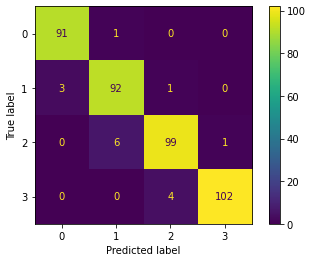

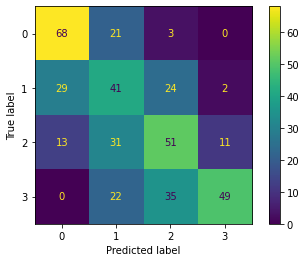

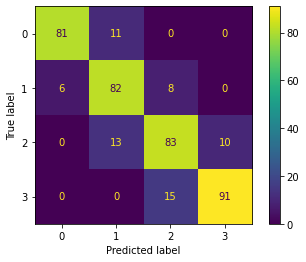

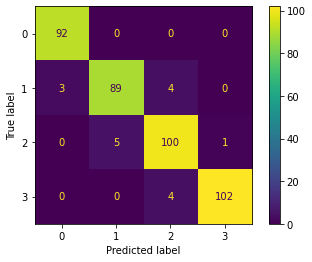

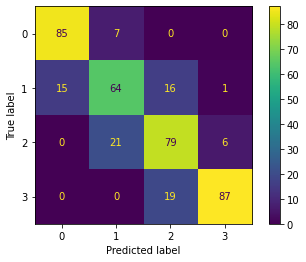

In [122]:
Conf_Matrix_Disp= {} 

Conf_Logistic_Reg_Matrix= ConfusionMatrixDisplay(Conf_Matrix['Logistic_Reg_Matrix'])
plot=Conf_Logistic_Reg_Matrix.plot()
Conf_KNeighbor_Matrix = ConfusionMatrixDisplay(Conf_Matrix['KNeighbor_Matrix'])
plot=Conf_KNeighbor_Matrix.plot()
Conf_DecisionTree_Matrix = ConfusionMatrixDisplay(Conf_Matrix['DecisionTree_Matrix'])
plot=Conf_DecisionTree_Matrix.plot()
Conf_Support_Vector_Matrix = ConfusionMatrixDisplay(Conf_Matrix['Support_Vector_Matrix'])
plot=Conf_Support_Vector_Matrix.plot()
Conf_Random_Forest_Matrix = ConfusionMatrixDisplay(Conf_Matrix['Random_Forest_Matrix'])
plot=Conf_Random_Forest_Matrix.plot()





### Plot Accuracy score

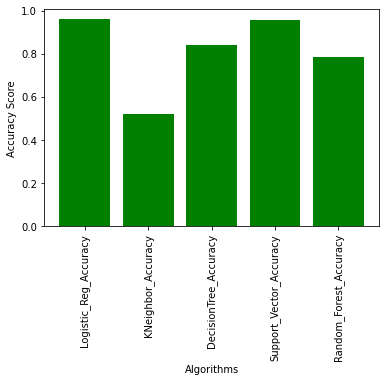

In [131]:
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.bar(list(Accuracy.keys()), Accuracy.values(), color='g')
plt.xticks(range(len(Accuracy)), list(Accuracy.keys()),rotation=90)
plt.show()